 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [36]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [37]:
# Reading whale returns
whale_df_data = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_df_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [38]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [39]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [40]:
# Reading algorithmic returns
algo_re_df_data = Path("./Resources/algo_returns.csv")
algo_re_df = pd.read_csv(algo_re_df_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_re_df.sort_index(inplace=True)
algo_re_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [41]:
# Count nulls
algo_re_df.isnull().sum()
algo_re_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [42]:
# Drop nulls
algo_re_df.dropna(inplace=True)
algo_re_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [43]:
# Reading S&P 500 Closing Prices
sp500_df_data = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_df_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [44]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [45]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [46]:
# Confirm data type
sp500_df.dtypes

Close    object
dtype: object

In [47]:
# Change type from object to float
sp500_df['Close'] = pd.to_numeric(sp500_df['Close'], errors='coerce')
sp500_df['Close']

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [49]:
# Calculate Daily Returns
sp500_daily_return = sp500_df.pct_change()
sp500_daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [50]:
# Drop nulls
sp500_daily_return.dropna(inplace=True)
sp500_daily_return.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [51]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["S&P 500"]
sp500_daily_return.columns = columns
sp500_daily_return.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [52]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_all_port = pd.concat([whale_df, algo_re_df, sp500_daily_return], axis="columns", join="inner")
combined_returns_all_port.sort_index
combined_returns_all_port.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of Whale, Algorithmic, and S&P 500'}, xlabel='Date'>

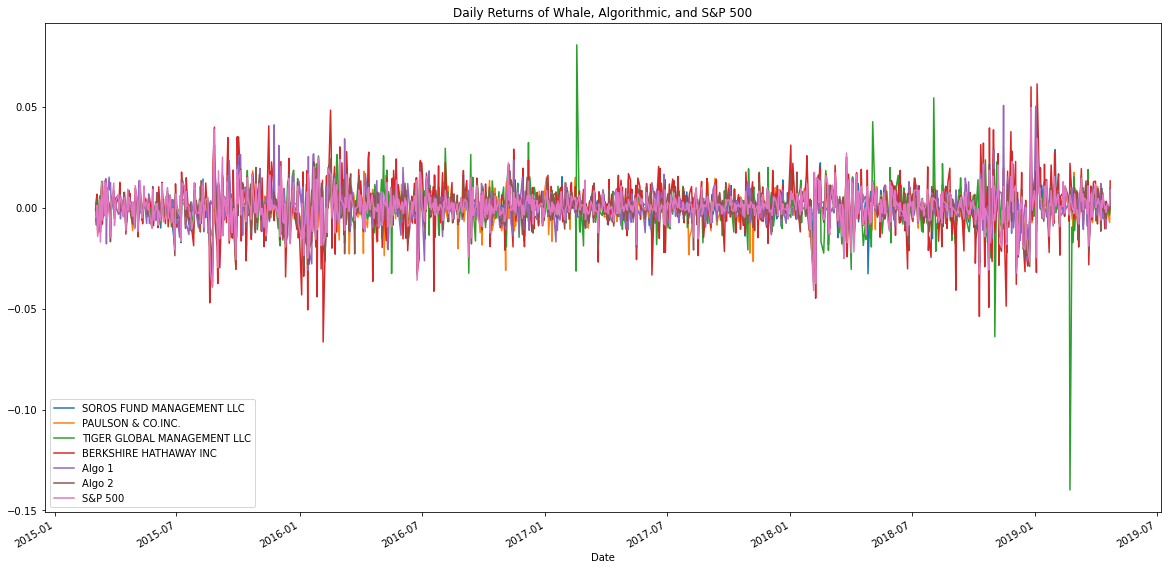

In [53]:
# Plot daily returns of all portfolios

combined_returns_all_port.plot(figsize=(20,10), title='Daily Returns of Whale, Algorithmic, and S&P 500')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

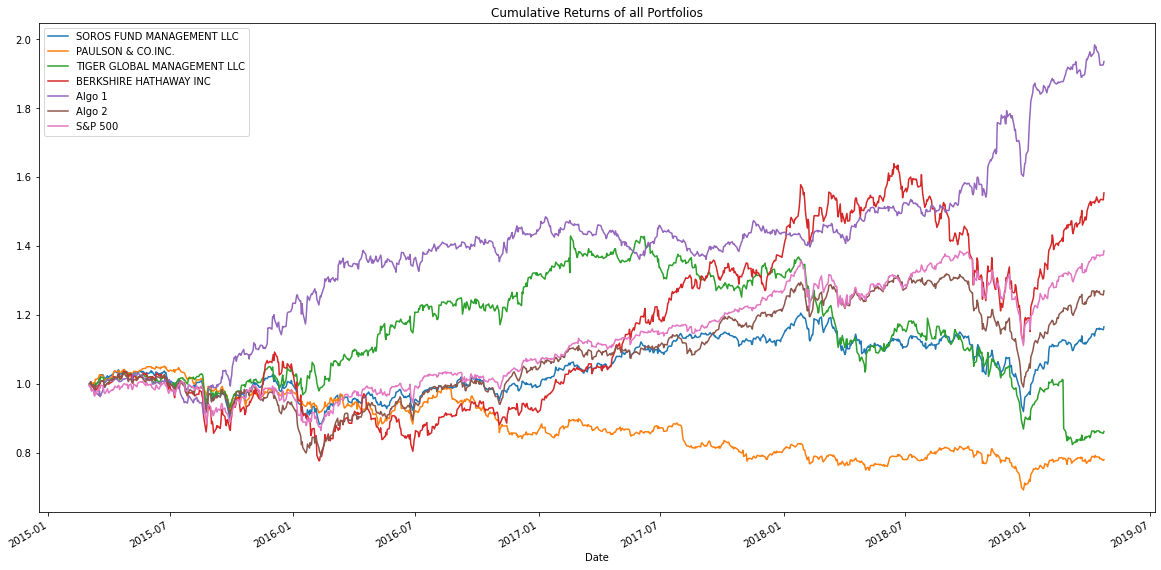

In [54]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_all_port).cumprod()
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns of all Portfolios')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Whale Returns Box Plot'}>

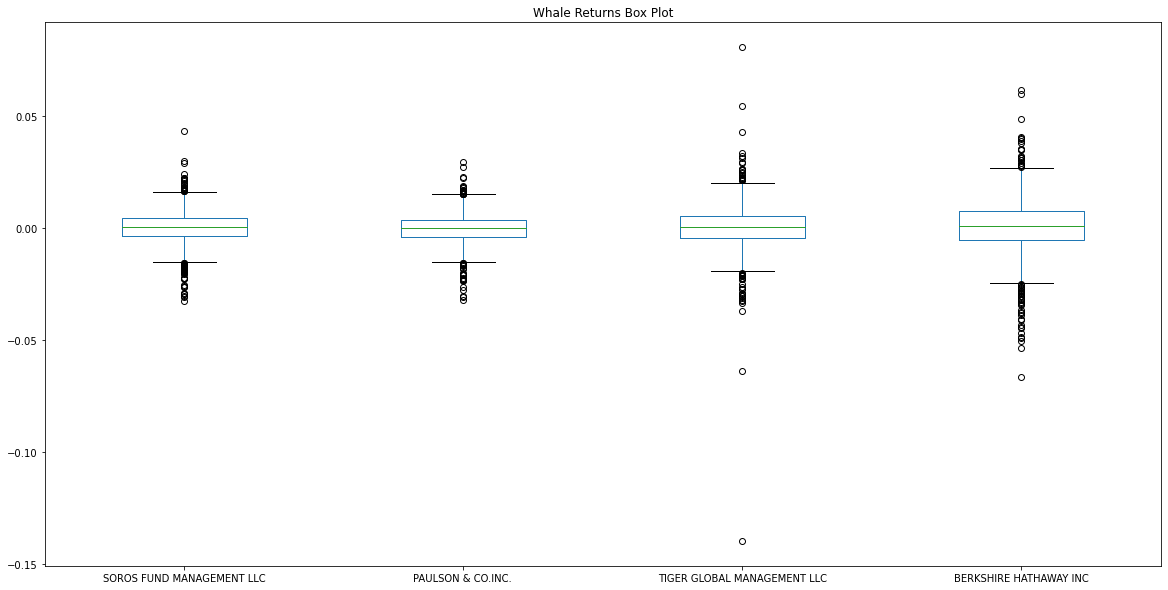

In [55]:
# Box plot to visually show risk
whale_df.plot.box(figsize=(20,10), title = 'Whale Returns Box Plot')

<AxesSubplot:title={'center':'Algorithmic Returns Box Plot'}>

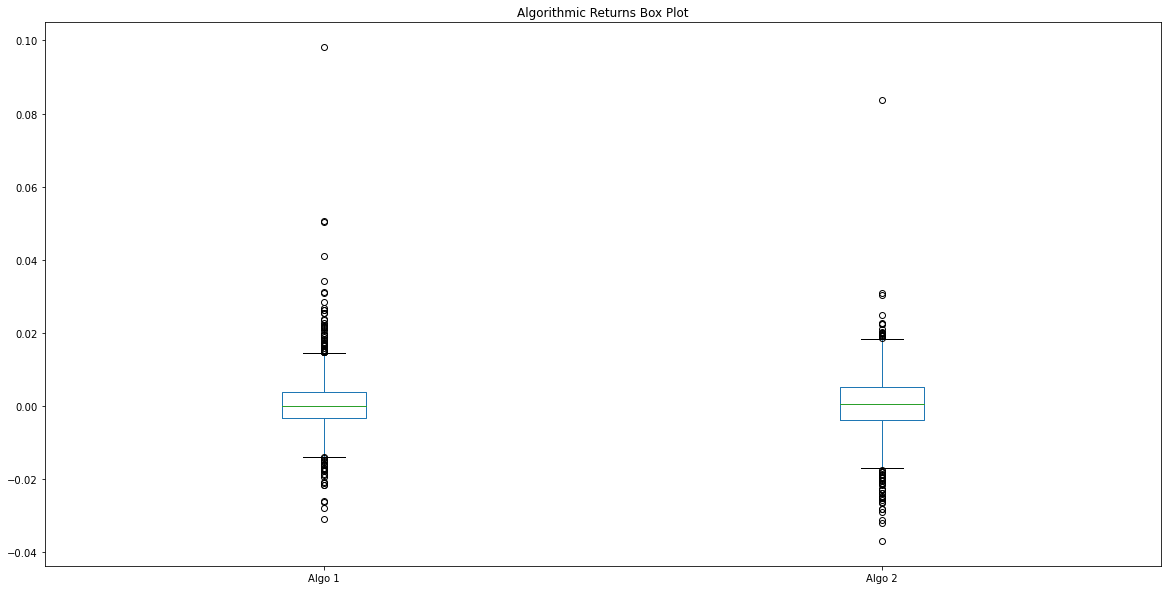

In [56]:
algo_re_df.plot.box(figsize=(20,10), title = 'Algorithmic Returns Box Plot')

<AxesSubplot:title={'center':'S&P 500 Box Plot'}>

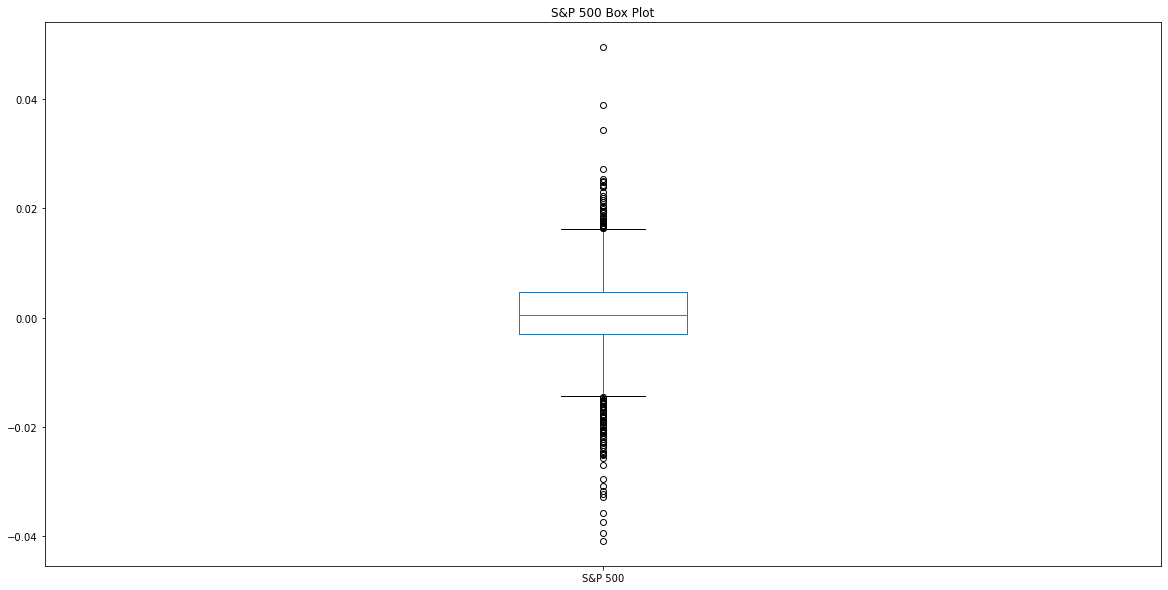

In [57]:
sp500_daily_return.plot.box(figsize=(20,10), title = 'S&P 500 Box Plot')

<AxesSubplot:title={'center':'Combined Portfolios Box Plot'}>

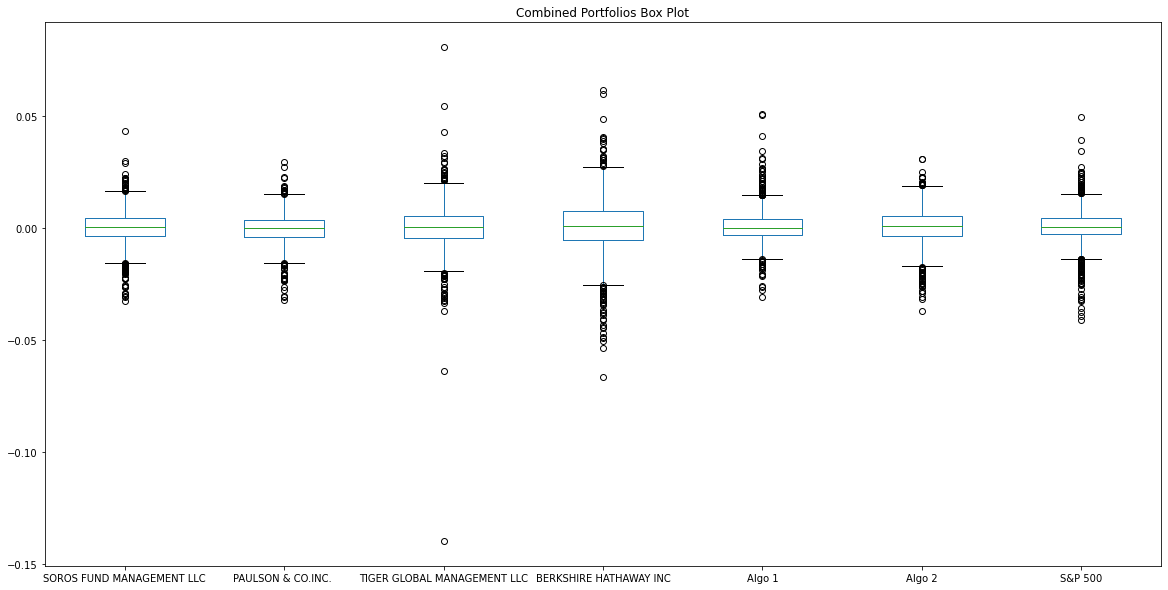

In [58]:
combined_returns_all_port.plot.box(figsize=(20,10), title = 'Combined Portfolios Box Plot')

### Calculate Standard Deviations

In [59]:
# Calculate the daily standard deviations of all portfolios
daily_std_all_portfolios = combined_returns_all_port.std()
daily_std_all_portfolios

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [61]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily_return.std()
print(sp500_std)

# Determine which portfolios are riskier than the S&P 500
combined_returns_std = daily_std_all_portfolios.sort_values(ascending = False)
combined_returns_std

S&P 500    0.008111
dtype: float64


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [63]:
# According to this calclation, we can determine that the portfolios that are risker than S&P 500 (0.008554), are SOROS FUND MANAGEMENT LLC (0.007895), Algo 1 (0.007620) and PAULSON & CO.INC. (0.007023). and the greater portfolios are BERKSHIRE HATHAWAY INC (0.012919) & TIGER GLOBAL MANAGEMENT LLC (0.010894). 

### Calculate the Annualized Standard Deviation

In [65]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [69]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns_all_port.rolling(window = 21).std().tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094
2019-04-23,0.004315,0.005695,0.004949,0.006602,0.005889,0.005582,0.004325


<AxesSubplot:title={'center':'rolling standard deviation for all portfolios'}, xlabel='Date'>

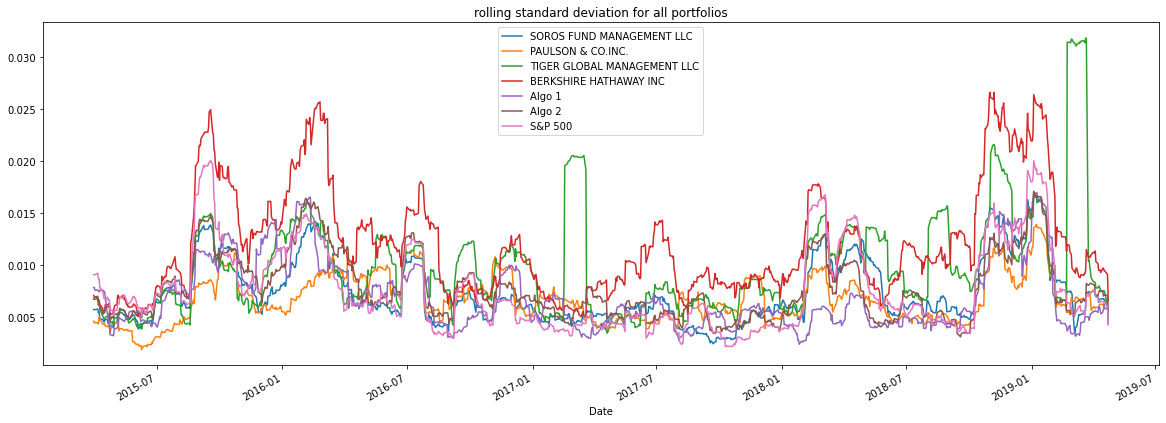

In [71]:
# Plot the rolling standard deviation
combined_returns_all_port.rolling(window = 21).std().plot(figsize = (20,7), title = 'rolling standard deviation for all portfolios')

### Calculate and plot the correlation

In [75]:
# Calculate the correlation
correlation = combined_returns_all_port.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

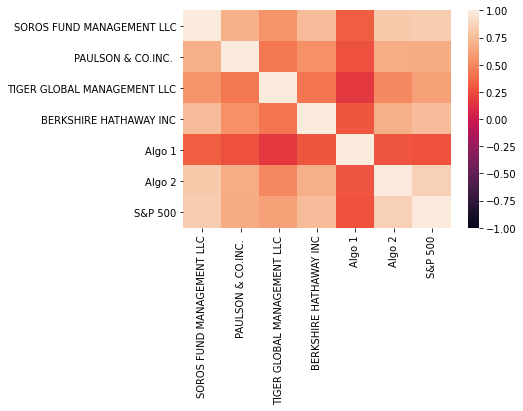

In [77]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [92]:
# Calculate covariance of a single portfolio
covariance = combined_returns_all_port['BERKSHIRE HATHAWAY INC'].cov(combined_returns_all_port['S&P 500'])
print(f'Covariance = {covariance}')

# Calculate variance of S&P 500
variance = combined_returns_all_port['S&P 500'].var()
print(f'Variance = {variance}')

# Computing beta
beta = covariance / variance
print(f'BERKSHIRE HATHAWAY INC - Beta = {beta}')

Covariance = 8.302834941861689e-05
Variance = 7.316632424648712e-05
BERKSHIRE HATHAWAY INC - Beta = 1.1347891297491723


<AxesSubplot:title={'center':'Rolling 60 Days Beta of BERKSHIRE HATHAWAY'}, xlabel='Date'>

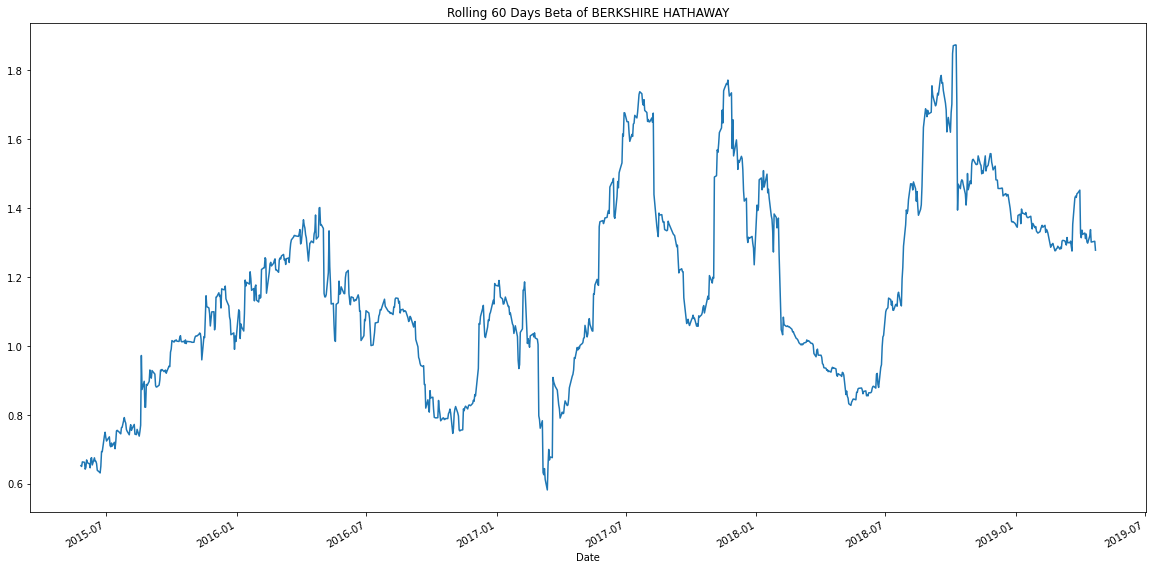

In [97]:
# Plot beta trend
rolling_covariance = combined_returns_all_port['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns_all_port['S&P 500'])
rolling_variance = combined_returns_all_port['S&P 500'].rolling(window=60).var()
rolling_BERKSHIRE_beta = rolling_covariance / rolling_variance
rolling_BERKSHIRE_beta.plot(figsize = (20,10), title = 'Rolling 60 Days Beta of BERKSHIRE HATHAWAY')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [100]:
# Use `ewm` to calculate the rolling window
Exponentially_Weighted_Average = combined_returns_all_port.ewm(span=21).mean()
Exponentially_Weighted_Average

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000565,-0.000674,-0.001563,-0.000921,-0.005424,0.000813,-0.004460
2015-03-05,0.001827,0.001063,-0.000131,0.001874,-0.003790,0.002096,-0.002392
2015-03-06,-0.000964,-0.000267,-0.002526,-0.002420,-0.004125,-0.001791,-0.005771
2015-03-09,-0.000593,0.000810,-0.000519,-0.002236,-0.004442,-0.001049,-0.003441
...,...,...,...,...,...,...,...
2019-04-16,0.002021,0.000516,0.000721,0.001277,0.000012,0.001271,0.001544
2019-04-17,0.001574,-0.000119,0.000255,0.001454,-0.000926,0.000680,0.001197
2019-04-18,0.001563,0.000003,0.000285,0.001496,-0.000895,0.000507,0.001232


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [105]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns_all_port.mean() * 252) / (combined_returns_all_port.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

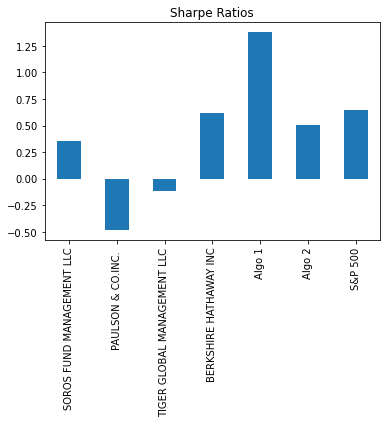

In [106]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [107]:
# According to the bar chart, it is clear that Algo 1 outperforms. 
# Althought Algo 2 does not, it still has a high degree of expected return for a relatively low amount of risk with sharpe ratio of 1.37.
# Thus, Algo 2 has a lower shaper than S&P 500's sharpe ratio.
# In comparison with whales portfolio, algorithmic portfolio perforrm beter with the exception of Berkshire Hathaway Inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [109]:
# Reading data from 1st stock
finv_df_data = Path("./Resources/FinVolution_Group_history.csv")
finv_df = pd.read_csv(finv_df_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
finv_df.sort_index(inplace=True)
finv_df.head()

,Close
Date,
2018-01-02 16:00:00,7.11
2018-01-03 16:00:00,7.00
2018-01-05 16:00:00,6.57
2018-01-06 16:00:00,7.69
2018-01-08 16:00:00,4.01


In [110]:
# Reading data from 2nd stock
sea_df_data = Path("./Resources/Sea_Limited_history.csv")
sea_df = pd.read_csv(sea_df_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sea_df.sort_index(inplace=True)
sea_df.head()

,Close
Date,
2018-01-02 16:00:00,11.92
2018-01-03 16:00:00,11.03
2018-01-05 16:00:00,10.48
2018-01-06 16:00:00,16.31
2018-01-08 16:00:00,14.62


In [111]:
# Reading data from 3rd stock
paypal_df_data = Path("./Resources/PayPal_Holdings_Inc_history.csv")
paypal_df = pd.read_csv(paypal_df_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
paypal_df.sort_index(inplace=True)
paypal_df.head()

,Close
Date,
2018-01-02 16:00:00,78.40
2018-01-03 16:00:00,78.64
2018-01-05 16:00:00,74.81
2018-01-06 16:00:00,83.25
2018-01-08 16:00:00,83.46


In [118]:
# Combine all stocks in a single DataFrame
combined_all_stocks = pd.concat([finv_df, sea_df, paypal_df], axis='columns', join='inner')
combined_all_stocks.head()

,Close,Close,Close
Date,,,
2018-01-02 16:00:00,7.11,11.92,78.40
2018-01-03 16:00:00,7.00,11.03,78.64
2018-01-05 16:00:00,6.57,10.48,74.81
2018-01-06 16:00:00,7.69,16.31,83.25
2018-01-08 16:00:00,4.01,14.62,83.46


In [119]:
# Reset Date index
combined_all_stocks.reset_index().head()

,Date,Close,Close,Close
0,2018-01-02 16:00:00,7.11,11.92,78.40
1,2018-01-03 16:00:00,7.00,11.03,78.64
2,2018-01-05 16:00:00,6.57,10.48,74.81
3,2018-01-06 16:00:00,7.69,16.31,83.25
4,2018-01-08 16:00:00,4.01,14.62,83.46


In [120]:
# Rename columns
columns = ["FinV", "Sea", "Paypal"]
combined_all_stocks.columns = columns
combined_all_stocks.head()

,FinV,Sea,Paypal
Date,,,
2018-01-02 16:00:00,7.11,11.92,78.40
2018-01-03 16:00:00,7.00,11.03,78.64
2018-01-05 16:00:00,6.57,10.48,74.81
2018-01-06 16:00:00,7.69,16.31,83.25
2018-01-08 16:00:00,4.01,14.62,83.46


In [121]:
#Drop time from the index
combined_all_stocks.index = combined_all_stocks.index.normalize()
combined_all_stocks.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-05', '2018-01-06',
               '2018-01-08', '2018-01-10', '2018-01-11', '2018-01-16',
               '2018-01-17', '2018-01-18',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=755, freq=None)

In [122]:
# Check Data Types
combined_all_stocks.dtypes

FinV      float64
Sea       float64
Paypal    float64
dtype: object

In [123]:
# Reorganize portfolio data by having a column per symbol
columns = ["FinV", "Sea", "Paypal"]
combined_all_stocks.columns = columns
combined_all_stocks.head()

,FinV,Sea,Paypal
Date,,,
2018-01-02,7.11,11.92,78.40
2018-01-03,7.00,11.03,78.64
2018-01-05,6.57,10.48,74.81
2018-01-06,7.69,16.31,83.25
2018-01-08,4.01,14.62,83.46


In [124]:
# Calculate daily returns
combined_stocks_daily_returns = combined_all_stocks.pct_change()

# Drop NAs
combined_stocks_daily_returns = combined_stocks_daily_returns.dropna()

# Display sample data
combined_stocks_daily_returns.head()

,FinV,Sea,Paypal
Date,,,
2018-01-03,-0.015471,-0.074664,0.003061
2018-01-05,-0.061429,-0.049864,-0.048703
2018-01-06,0.170472,0.556298,0.112819
2018-01-08,-0.478544,-0.103617,0.002523
2018-01-10,0.321696,-0.008892,0.049006


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [131]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns_we = combined_stocks_daily_returns.dot(weights)
portfolio_returns_we = portfolio_returns_we.rename("My Portfolio Returns")
# Display sample data
portfolio_returns_we.head()


Date
2018-01-03   -0.029025
2018-01-05   -0.053332
2018-01-06    0.279863
2018-01-08   -0.193213
2018-01-10    0.120603
Name: My Portfolio Returns, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [133]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([portfolio_returns_we, combined_returns_all_port], axis="columns", join="outer")
all_portfolio_returns.head()

,My Portfolio Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2015-03-03,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [134]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns = all_portfolio_returns.dropna()
all_portfolio_returns.head()

,My Portfolio Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-01-03,-0.029025,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-05,-0.053332,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,-0.193213,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-10,0.120603,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.001112
2018-01-11,0.014489,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.007034


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [136]:
# Calculate the annualized `std`
all_portfolios_std = all_portfolio_returns.std()* np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Std for all Portfolios with 21 days window'}, xlabel='Date'>

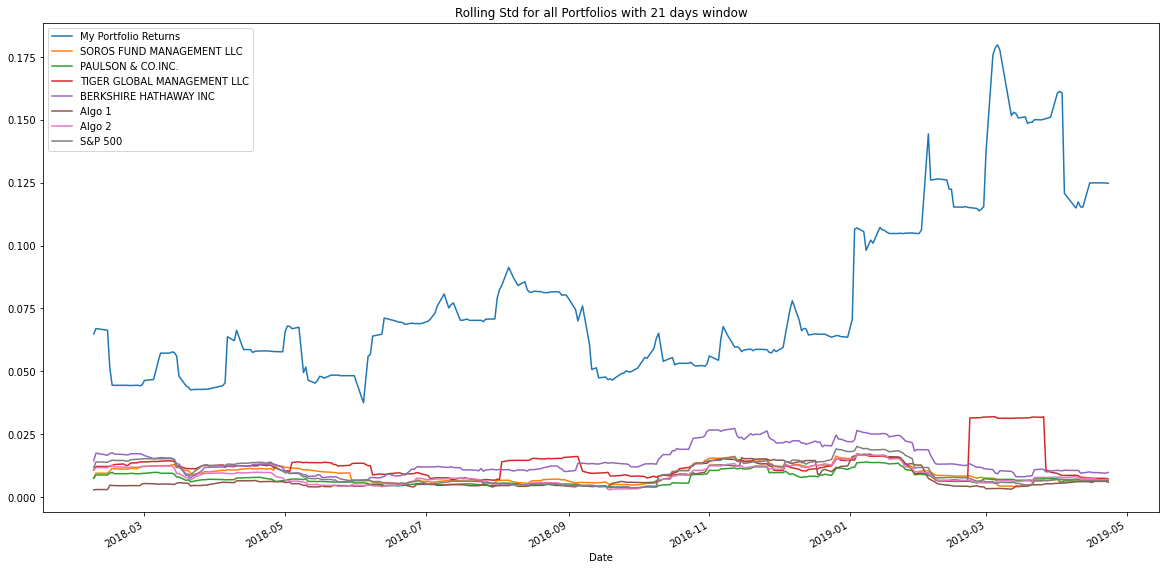

In [138]:
# Calculate rolling standard deviation
all_portfolios_std_21w = all_portfolio_returns.rolling(window = 21).std()
# Plot rolling standard deviation
all_portfolios_std_21w.plot(figsize=(20,10), title='Rolling Std for all Portfolios with 21 days window')

### Calculate and plot the correlation

<AxesSubplot:>

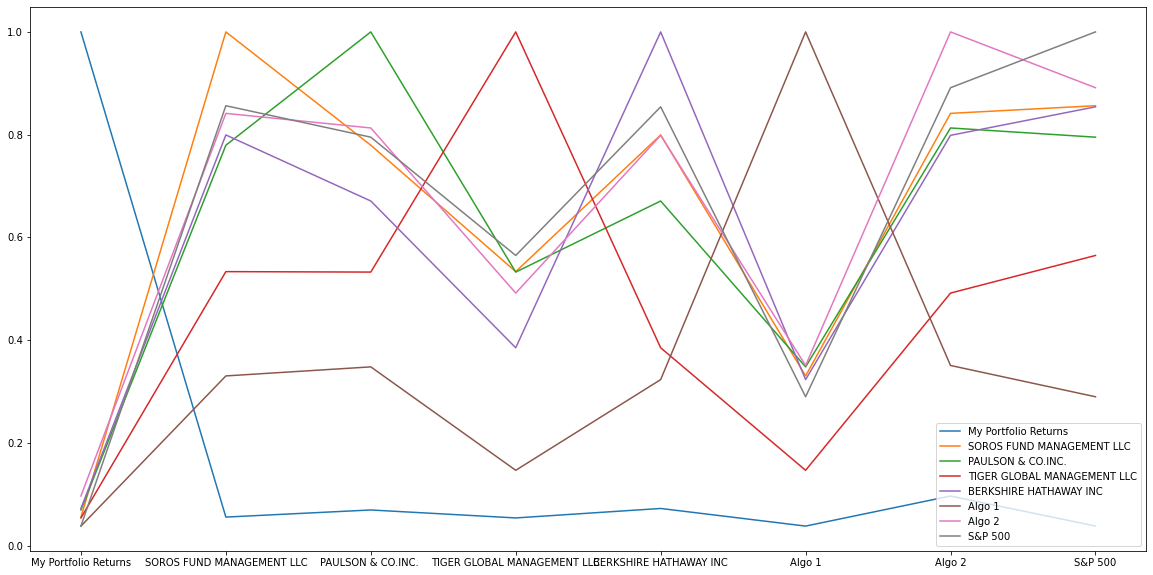

In [142]:
# Calculate and plot the correlation
correlation = all_portfolio_returns.corr()
correlation.plot(figsize=(20,10))

<AxesSubplot:>

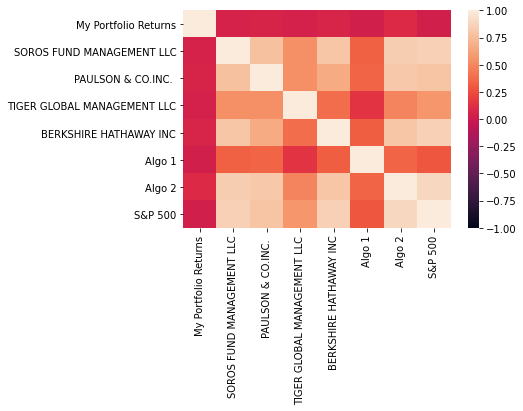

In [143]:
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling My Portafolio Beta 60 Days window Compared to S&P 500'}, xlabel='Date'>

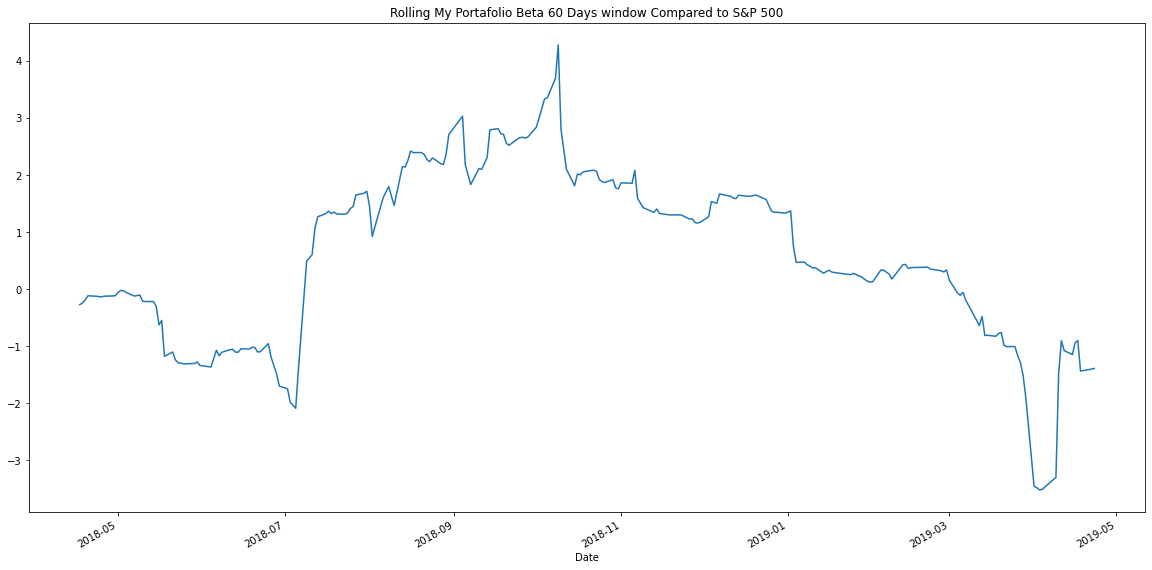

In [146]:
# Calculate and plot Beta
my_portfolio_covariance = all_portfolio_returns['My Portfolio Returns'].rolling(window=60).cov(all_portfolio_returns['S&P 500'])

# calculate variance of S&P500

variance_sp500 = all_portfolio_returns['S&P 500'].rolling(window=60).var()

# calculate Beta for my portfolio

my_portfolio_beta_60day = my_portfolio_covariance / variance_sp500

# plotting beta 60days rolling

my_portfolio_beta_60day.plot(figsize=(20,10), title = 'Rolling My Portafolio Beta 60 Days window Compared to S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [148]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_all_portfolios = (all_portfolio_returns.mean() * 252) / (all_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios_all_portfolios.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -1.222010
PAULSON & CO.INC.             -0.433217
Algo 2                        -0.102999
SOROS FUND MANAGEMENT LLC      0.032315
S&P 500                        0.150264
BERKSHIRE HATHAWAY INC         0.197865
Algo 1                         1.910084
My Portfolio Returns           1.920958
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios All Portfolios'}>

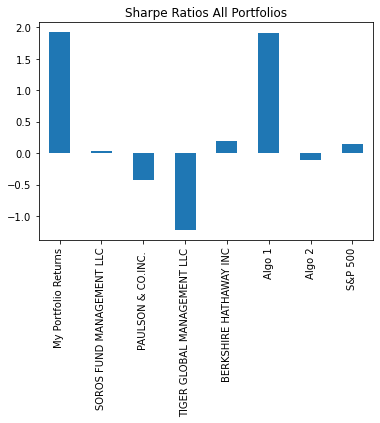

In [149]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all_portfolios.plot.bar(title='Sharpe Ratios All Portfolios')

### How does your portfolio do?

Write your answer here!

In [152]:
print(f'My portfolio performs very well with 1.92 sharpe ratio compared to other portfolios with the exception of Algo 1, which does really good as well. In conclusion, I would invest in it')

My portfolio performs very well with 1.92 sharpe ratio compared to other portfolios with the exception of Algo 1, which does really good as well. In conclusion, I would invest in it
